In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [ ]:
df = pd.read_csv('gld_price_data.csv')
data = df[['GLD']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, time steps, features]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0498
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 9.1810e-04
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 9.6992e-04
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 9.1462e-04
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.0952e-04
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.4575e-04
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 7.9040e-04
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 7.1630e-04
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 6.7178e-04
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 6.8510e-04
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 6.7219e-04
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.9403e-04
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 5.5603e-04
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 6.5415e-04
Epoch 15/20
70/70 ━

In [ ]:
predictions = model.predict(X)
predicted_prices = scaler.inverse_transform(predictions)

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


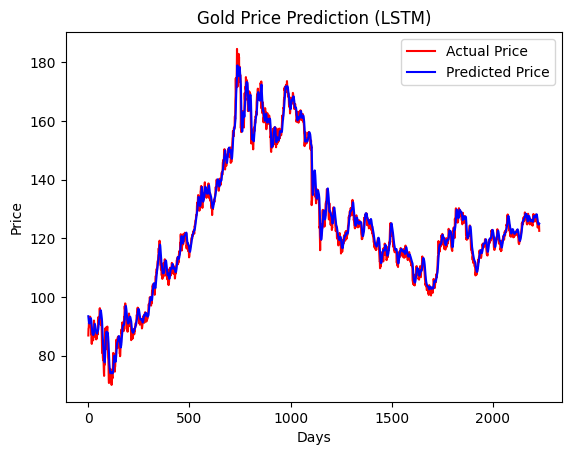

In [ ]:
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))
plt.plot(actual_prices, color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Gold Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.fit(X, y, validation_split=0.1, epochs=50, batch_size=32, callbacks=[early_stop])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.8270e-04 - val_loss: 1.2724e-04
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.1413e-04 - val_loss: 2.3728e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 4.9430e-04 - val_loss: 1.4242e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.9062e-04 - val_loss: 1.4174e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 4.3822e-04 - val_loss: 1.1190e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 3.9629e-04 - val_loss: 1.0991e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 4.2392e-04 - val_loss: 1.5298e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.8386e-04 - val_loss: 1.0104e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 3.7421e-04 - val_loss: 1.2426e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 4.4525e-04 - val_loss: 1.0408e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 3.6061e-0

In [ ]:
y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_inverse = scaler.inverse_transform(y.reshape(-1, 1))


mse = mean_squared_error(y_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_inverse, y_pred_inverse)
r2 = r2_score(y_inverse, y_pred_inverse)

print(" Model Evaluation Metrics:")
print(" Mean Absolute Error (MAE):", round(mae, 3))
print(" Root Mean Squared Error (RMSE):", round(rmse, 3))
print(" R² Score:", round(r2, 4))

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
 Model Evaluation Metrics:
 Mean Absolute Error (MAE): 1.338
 Root Mean Squared Error (RMSE): 1.862
 R² Score: 0.9934
